# Pet Finder Adoption Rate Project Report

**Student**: Martiros YEGHIAZARYAN 

**Professor**: Michel RIVEILL

**Subject**: Machine Learning Algorithms

**Date**: 25 March, 2023

**Introduction**: In this notebook I am going to present how we can predict how long it will take for a pet to be adopted. We are given many different features about the pet and the listing for that pet. The features cover the most commonly found types of data: tabular, text, and image. I will explain the dataset in more detail in this notebook. I will show the data analysis and the different prediction models I tuned and used to predict the AdoptionSpeed column for the test data. This column has four values 0, 1, 2, 3, 4. These are the bins for how long it took for the pet to be adopted. I used models like Random Forest Classifier, Support Vector Classifier, KNearestNeighbours Classifier, Gradient Boosting for classification, Bagging Decision Trees, Logistic Regression, Ridge Classifier.


Let's get started with exploring the dataset.

## Some Imports

In [1]:
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import set_config

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

You might need to initally download the opencv library for working with the image data:

In [4]:
# !pip install opencv-python # Reading the dataset

## Reading the dataset

In [5]:
path = r'/Users/martirosYegh/Downloads/' # CHANGE THE PATH 

In [6]:
train_set = pd.read_csv(path + 'train (1).csv')

## Dataset Description

In [7]:
train_set

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",3.0,2fbf2cb7c-1.jpg,Mixed_Breed
2,Dog,1.0,Male,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,Puppy's age is unknown. My husband went mounta...,1.0,97f683e04-1.jpg,Mixed_Breed
3,Dog,3.0,Male,Black,Unknown,Unknown,Medium,Yes,Unknown,Yes,Unknown,Healthy,0.0,"Hi, I'm Randy, few weeks ago I got beaten by h...",4.0,479500716-2.jpg,Mixed_Breed
4,Dog,8.0,Male,Brown,Unknown,Unknown,Large,Yes,Yes,Yes,No,Healthy,0.0,"Abandoned puppy looking for a home. Hi, he is ...",3.0,4a2270c3e-4.jpg,Mixed_Breed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Dog,37.0,Female,Cream,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,0.0,"Kindly visit PAWS, PJ to enquire / adopt. Bubb...",2.0,91add3784-1.jpg,Labrador_Retriever
8996,Cat,6.0,Male,White,Unknown,Unknown,Medium,Yes,Unknown,Unknown,Unknown,Healthy,0.0,playful and lovely cat :),4.0,4785a8894-1.jpg,Domestic_Short_Hair
8997,Cat,5.0,Male,Black,Brown,Unknown,Small,Yes,Yes,Yes,Yes,Healthy,0.0,"Active, healthy and sneeky.",3.0,f66e4eecf-5.jpg,Bengal
8998,Dog,12.0,Male,Brown,White,Unknown,Medium,No,Yes,Yes,Yes,Healthy,0.0,Isaac was rescued from the street and grew up ...,4.0,11948e0ef-1.jpg,Jack_Russell_Terrier


Let's see the size of the dataset and data types:

In [8]:
print('There are',len(train_set), 'rows in our train dataset.')

train_set.info()

There are 9000 rows in our train dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9000 non-null   object 
 1   Age            9000 non-null   float64
 2   Gender         9000 non-null   object 
 3   Color1         9000 non-null   object 
 4   Color2         9000 non-null   object 
 5   Color3         9000 non-null   object 
 6   MaturitySize   9000 non-null   object 
 7   FurLength      9000 non-null   object 
 8   Vaccinated     9000 non-null   object 
 9   Dewormed       9000 non-null   object 
 10  Sterilized     9000 non-null   object 
 11  Health         9000 non-null   object 
 12  Fee            9000 non-null   float64
 13  Description    9000 non-null   object 
 14  AdoptionSpeed  9000 non-null   float64
 15  Images         9000 non-null   object 
 16  Breed          9000 non-null   object 
dtypes: float64

Have a look at the columns of our training data:

In [9]:
train_set.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'AdoptionSpeed', 'Images', 'Breed'],
      dtype='object')

In this notebook I have tried a lot of subsets of datasets and the following cell is to control the number of data to fasten and slower the execution of the cells and to see the different results we get.

In [10]:
# Control the batch of the data

N = 9000
train_set = train_set[:N]

In [11]:
test_set = pd.read_csv(path + "test (1).csv")

# img_dir = "test_images/"
test_set['Images'] = [path +img for img in test_set['Images']]

In [12]:
print('There are',len(test_set), 'rows in our test dataset.')

There are 500 rows in our test dataset.


Having a look at the columns of our testing data:

In [13]:
test_set.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'Images', 'Breed'],
      dtype='object')

## Data Analysis

**Images**

For pets that have photos, they are named in the format of PetID-ImageNumber.jpg. \

Our **Target** is the **Adoption speed**

0 - Pet was adopted on the same day as it was listed.\
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.\
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.\
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.\
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

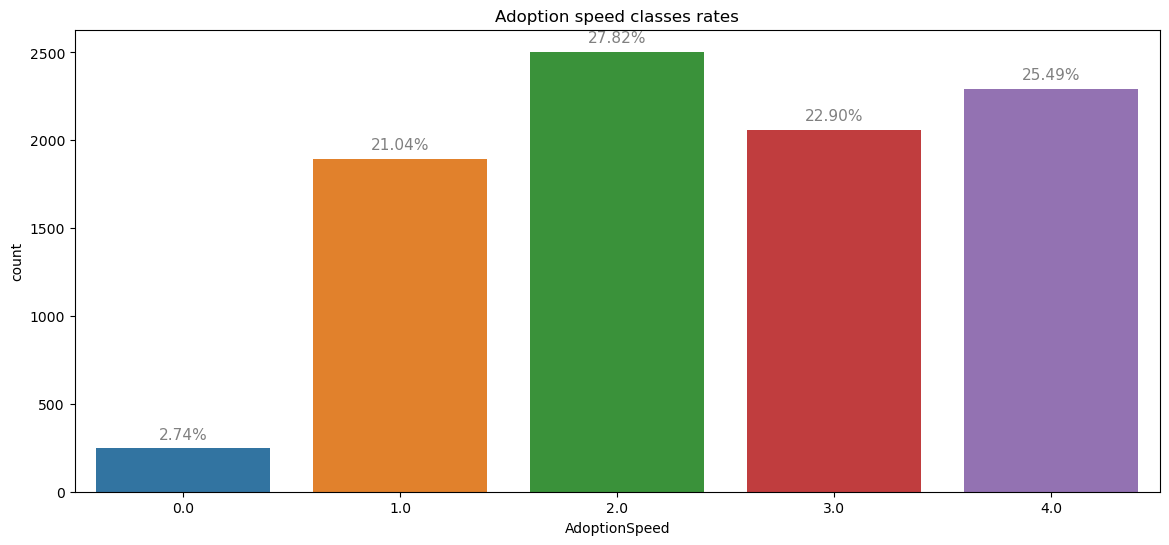

In [14]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x=train_set['AdoptionSpeed'])
plt.title('Adoption speed classes rates')
ax = g.axes

for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train_set.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

We can see that some animals were adopted right away, but these are unusual instances. Perhaps someone wished to adopt any animal, or the animal was fortunate to be seen by someone looking for an animal like it. Many animals are not accepted at all.

It is nice that a lot of pets are adopted within a first week of being listed!

Another interesting feature is the linear relationship between the classes; the higher the number, the worse the condition. 


### Type:

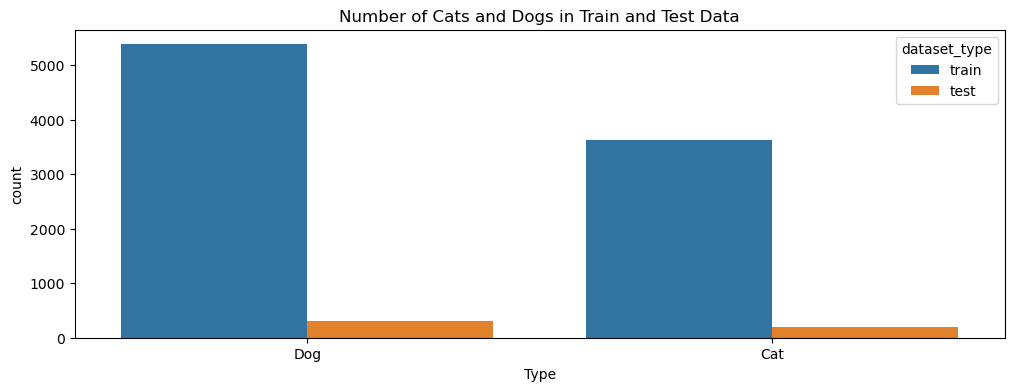

In [15]:
train_set['dataset_type'] = 'train'
test_set['dataset_type'] = 'test'

all_data = pd.concat([train_set, test_set])

plt.figure(figsize=(12, 4))
sns.countplot(x='Type', data=all_data, hue='dataset_type')
plt.title('Number of Cats and Dogs in Train and Test Data')
plt.show()

Printing the exact numbers:

In [16]:
train_cat_count = train_set[train_set['Type'] == 'Cat'].shape[0]
train_dog_count = train_set[train_set['Type'] == 'Dog'].shape[0]

test_cat_count = test_set[test_set['Type'] == 'Cat'].shape[0]
test_dog_count = test_set[test_set['Type'] == 'Dog'].shape[0]

print(f"Number of cats in train data: {train_cat_count}")
print(f"Number of dogs in train data: {train_dog_count}")
print(f"Number of cats in test data: {test_cat_count}")
print(f"Number of dogs in test data: {test_dog_count}")

Number of cats in train data: 3620
Number of dogs in train data: 5380
Number of cats in test data: 199
Number of dogs in test data: 301


The difference in the number of cats and dogs in the training data set is quite significant, with 3620 cats and 5380 dogs. Similarly, there is a significant difference in the number of cats and dogs in the test data set, with only 199 cats and 301 dogs.

This imbalance in the number of cats and dogs in the data set could potentially impact the adoption rate, as there may be more demand for one type of pet over the other. For example, if there are more people interested in adopting dogs, this could lead to a higher adoption rate for dogs compared to cats. On the other hand if there are more cats than dogs available for adoption, this could lead to a higher adoption rate for cats.

### Age:

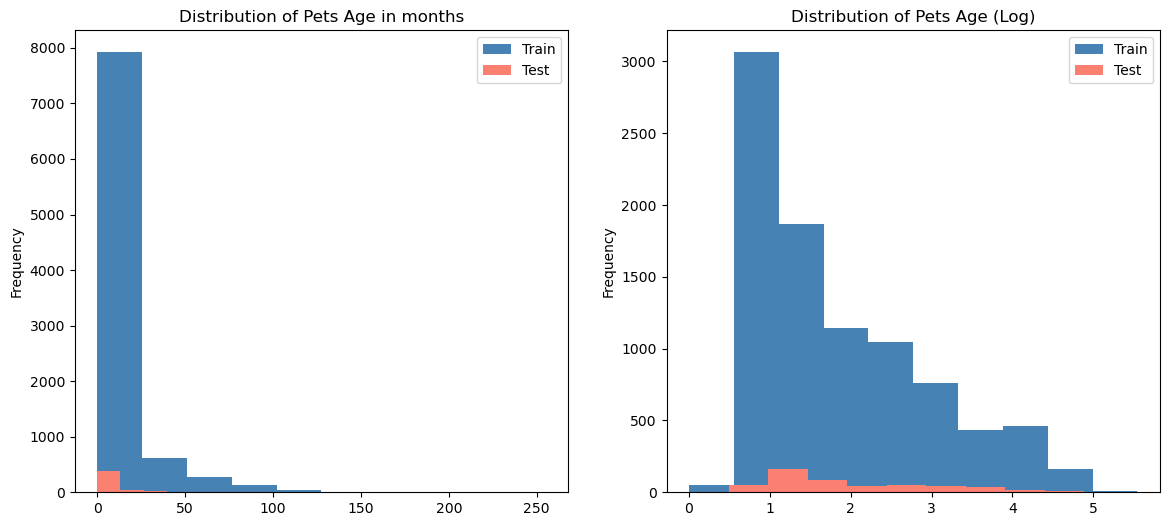

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Distribution of Pets Age in months")
train_set.Age.plot(kind='hist', label='Train', color="steelblue")
test_set.Age.plot(kind='hist', label='Test', color="salmon")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of Pets Age (Log)")
np.log1p(train_set["Age"]).plot(kind='hist', label='Train', color="steelblue")
np.log1p(test_set["Age"]).plot(kind='hist', label='Test', color="salmon")
plt.legend()


In [18]:
train_set['Age'].value_counts().head(10)

2.0     1965
3.0     1175
1.0     1098
4.0      691
12.0     653
24.0     430
5.0      390
6.0      365
36.0     289
8.0      204
Name: Age, dtype: int64

We can see that the majority of the animals are between one and two months old (3503 animals). (2304 pets). The following three groups have the most pets: 3 months (1966), 4 months (1109), and 12 months. (967 pets).

The most frequent ages are within the first few months of a pet's life, which indicates that in the dataset there are very young pets. In addition, there is a decline in the number of pets as they get older, with only a small number of dogs older than 8 months included in the dataset.

Overall, we can see a possibility that a pet's age may have an impact on how fast it is adopted, with younger animals being more likely to do so than older ones.

In [19]:
counts = train_set.groupby(['Age', 'AdoptionSpeed']).size().reset_index(name='Count')
print(counts)

       Age  AdoptionSpeed  Count
0      0.0            0.0      4
1      0.0            1.0     20
2      0.0            2.0     14
3      0.0            3.0     11
4      0.0            4.0      3
..     ...            ...    ...
291  180.0            3.0      1
292  180.0            4.0      1
293  212.0            3.0      1
294  212.0            4.0      1
295  255.0            4.0      2

[296 rows x 3 columns]


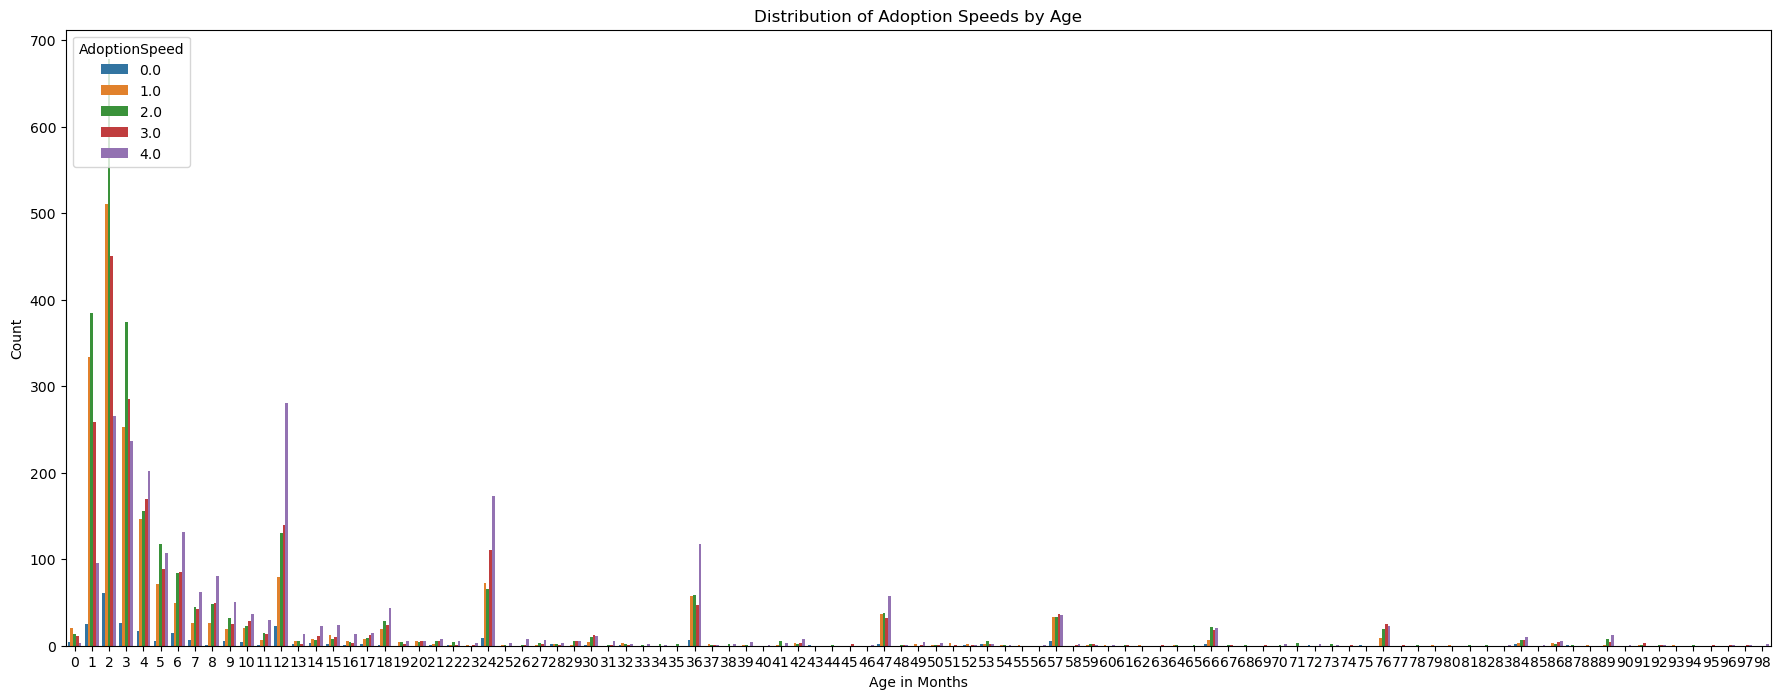

In [20]:
fig, ax = plt.subplots(figsize=(22, 8))
sns.barplot(x='Age', y='Count', hue='AdoptionSpeed', data=counts, ax=ax)
ax.set_title("Distribution of Adoption Speeds by Age")
ax.set_xlabel("Age in Months")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticks().astype(int))
plt.show()

We can see that young pets are adopted quite fast and most of them are adopted:

### Gender:

In [21]:
gender_counts = train_set['Gender'].value_counts()
print(gender_counts)

Female    5047
Male      3953
Name: Gender, dtype: int64


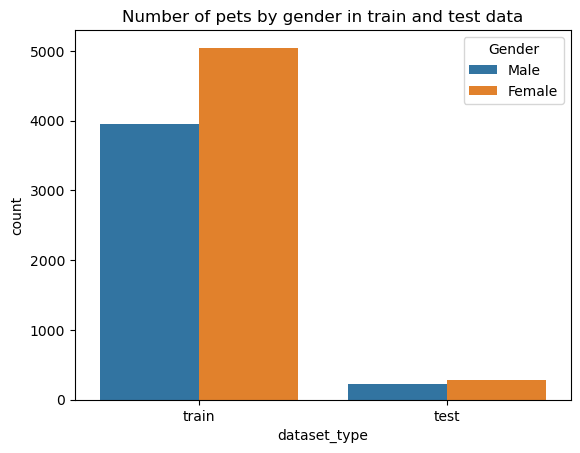

In [22]:
sns.countplot(x='dataset_type', data=all_data, hue='Gender');
plt.title('Number of pets by gender in train and test data');


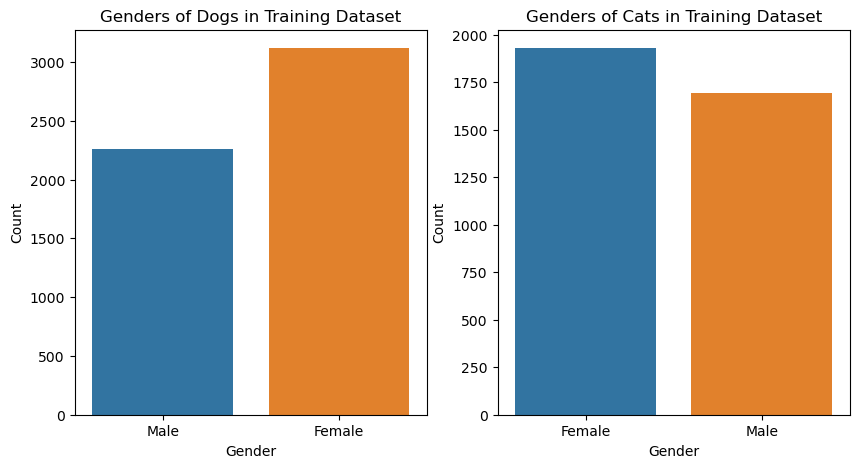

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

train_dog = train_set[train_set['Type'] == "Dog" ]
train_cat = train_set[train_set['Type'] == "Cat" ]

sns.countplot(x='Gender', data=train_dog, ax=axes[0])
sns.countplot(x='Gender', data=train_cat, ax=axes[1])

axes[0].set_title("Genders of Dogs in Training Dataset")
axes[1].set_title("Genders of Cats in Training Dataset")
axes[0].set_xlabel('Gender')
axes[1].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

plt.show()

Cats have nearly equal male and female populations. Dogs have more females than males. Both in cats and dogs, gender distributions are acceptable.\
Let's do the same for test data.

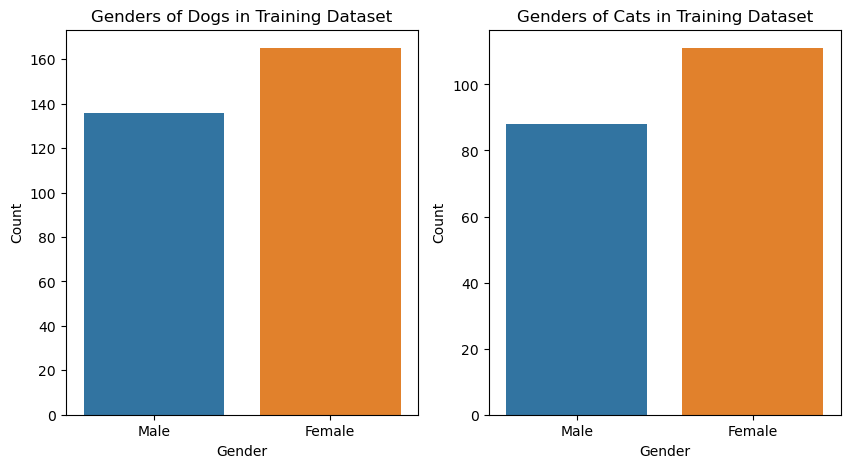

In [24]:
test_dog = test_set[test_set['Type'] == "Dog" ]
test_cat = test_set[test_set['Type'] == "Cat" ]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Gender', data=test_dog, ax=axes[0])
sns.countplot(x='Gender', data=test_cat, ax=axes[1])

axes[0].set_title("Genders of Dogs in Training Dataset")
axes[1].set_title("Genders of Cats in Training Dataset")
axes[0].set_xlabel('Gender')
axes[1].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

plt.show()


The test data's gender distribution isn't too bad. Cats and dogs have more females than males, but the difference is not very large.

### Color:

In [25]:
print(train_set.Color1.unique())
print(train_set.Color2.unique())
print(train_set.Color3.unique())

['Brown' 'Black' 'Golden' 'White' 'Cream' 'Yellow' 'Gray']
['Cream' 'Unknown' 'White' 'Golden' 'Gray' 'Brown' 'Yellow']
['Unknown' 'White' 'Golden' 'Gray' 'Cream' 'Yellow']


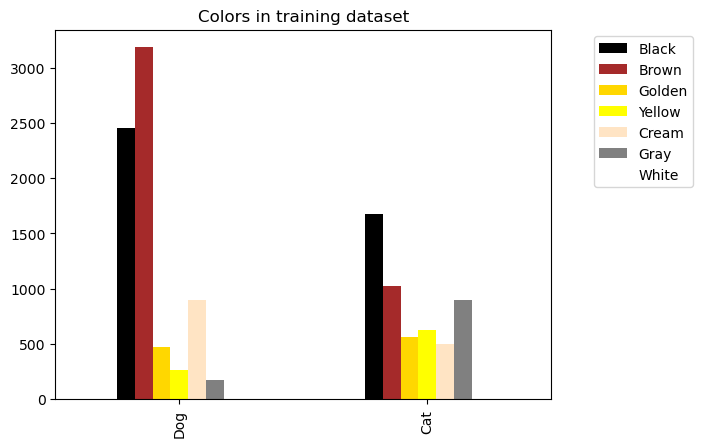

In [26]:
train_dog = train_set[train_set['Type'] == "Dog"]
train_cat = train_set[train_set['Type'] == "Cat"]

colors = ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White']
color_map = {'Black': 'black', 'Brown': 'brown', 'Golden': 'gold', 'Yellow': 'yellow', 'Cream': 'bisque', 'Gray': 'gray', 'White': 'white'}

color_counts = pd.DataFrame({color: [sum(train_animal[col].eq(color).sum() for col in ['Color1', 'Color2', 'Color3']) for train_animal in [train_dog, train_cat]] for color in colors}, index=['Dog', 'Cat'])

color_counts.plot(kind='bar', color=list(color_map.values()), title='Colors in training dataset')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

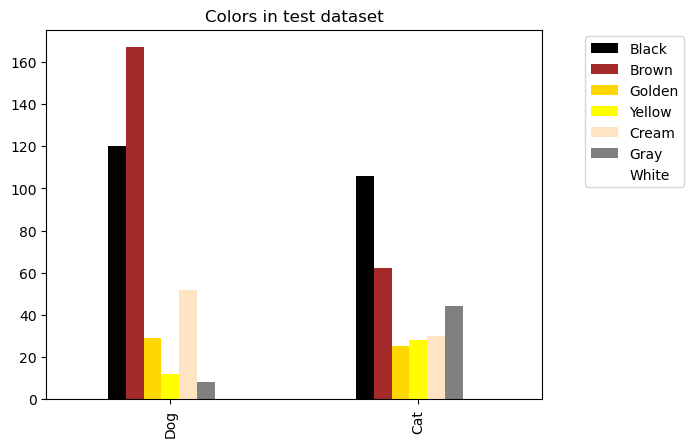

In [27]:
test_dog = test_set[test_set['Type'] == "Dog"]
test_cat = test_set[test_set['Type'] == "Cat"]

colors = ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White']
color_map = {'Black': 'black', 'Brown': 'brown', 'Golden': 'gold', 'Yellow': 'yellow', 'Cream': 'bisque', 'Gray': 'gray', 'White': 'white'}

color_counts = pd.DataFrame({color: [sum(train_animal[col].eq(color).sum() for col in ['Color1', 'Color2', 'Color3']) for train_animal in [test_dog, test_cat]] for color in colors}, index=['Dog', 'Cat'])

color_counts.plot(kind='bar', color=list(color_map.values()), title='Colors in test dataset')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

We can observe that black and brown are the most common colors. It's worth noting that there are hardly any dogs that are gray or yellow.

In [28]:
color1_stats = train_set.groupby('Color1')['AdoptionSpeed'].agg([np.mean, np.median, np.std])
color2_stats = train_set.groupby('Color2')['AdoptionSpeed'].agg([np.mean, np.median, np.std])
color3_stats = train_set.groupby('Color3')['AdoptionSpeed'].agg([np.mean, np.median, np.std])

color1_stats.columns = ['Mean Adoption Rate', 'Median Adoption Rate', 'Standard Deviation']
color2_stats.columns = ['Mean Adoption Rate', 'Median Adoption Rate', 'Standard Deviation']
color3_stats.columns = ['Mean Adoption Rate', 'Median Adoption Rate', 'Standard Deviation']

print(color1_stats)
print(color2_stats)
print(color3_stats)

        Mean Adoption Rate  Median Adoption Rate  Standard Deviation
Color1                                                              
Black             2.481446                   2.0            1.141104
Brown             2.547334                   3.0            1.168467
Cream             2.329489                   2.0            1.150479
Golden            2.387312                   2.0            1.183883
Gray              2.331787                   2.0            1.186704
White             2.391011                   2.0            1.172089
Yellow            2.539894                   3.0            1.192646
         Mean Adoption Rate  Median Adoption Rate  Standard Deviation
Color2                                                               
Brown              2.500838                   2.0            1.099962
Cream              2.396352                   2.0            1.195418
Golden             2.449315                   2.0            1.204744
Gray               2.256619  

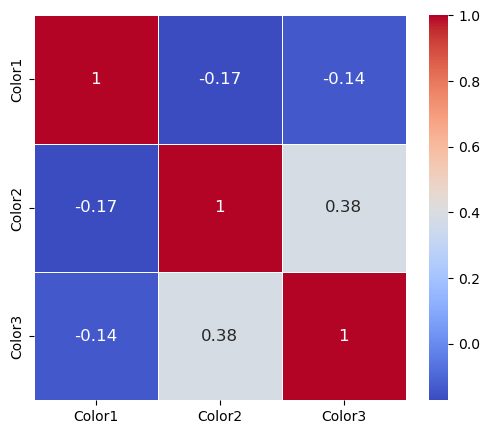

In [29]:
color_codes = train_set[['Color1', 'Color2', 'Color3']].apply(lambda x: pd.factorize(x)[0])
color_corr = color_codes.corr(method='pearson', min_periods=1)

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(color_corr, annot=True, linewidths=.5, cmap='coolwarm', ax=ax, annot_kws={"fontsize":12})
plt.show()

From the correlation matrix, we can see that:

- Color1 is negatively correlated with Color2 and Color3, with correlation coefficients of -0.172249 and -0.139436, respectively. This suggests that as Color1 increases, Color2 and Color3 tend to decrease, and vice versa.
- Color2 and Color3 have a positive correlation with each other, with a correlation coefficient of 0.382073. This means that as Color2 increases, Color3 also tends to increase, and vice versa.

### Vaccinated, Dewormed, Sterilized

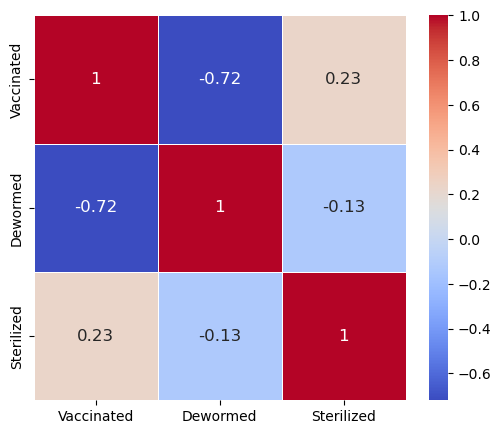

In [30]:
corr_health= train_set[['Vaccinated', 'Dewormed', 'Sterilized']].apply(lambda x : pd.factorize(x)[0])
corr_health = corr_health.corr(method='pearson', min_periods=1)

fig, ax = plt.subplots(figsize=(6,5))        
sns.heatmap(corr_health, annot=True, linewidths=.5, cmap='coolwarm', ax=ax, annot_kws={"fontsize":12})
plt.show()

With a correlation coefficient of -0.719848, the Dewormed and Vaccinated columns appear to be negatively correlated with one another. The contrary is also true: pets who are more likely to be vaccinated are also less likely to be dewormed. This negative link can be brought about by variations in pet preferences or in the availability and cost of the two medical treatments.

In comparison to the other relationships, the Vaccinated and Sterilized columns show a positive correlation of 0.232903, which is rather low. Inversely, pets who are somewhat more likely to be sterilized are also slightly more likely to get vaccinated. Although there is a correlation between the two variables, it is not strong enough to make any firm conclusions or predictory connections.

Pets that are more likely to be dewormed are slightly less likely to be sterilized, and vice versa, according to the Dewormed and Sterilized columns' weak negative correlation of -0.125673. The general health state and adoption rate of the animals may not be significantly affected by this association, which is likewise quite weak.

### Health

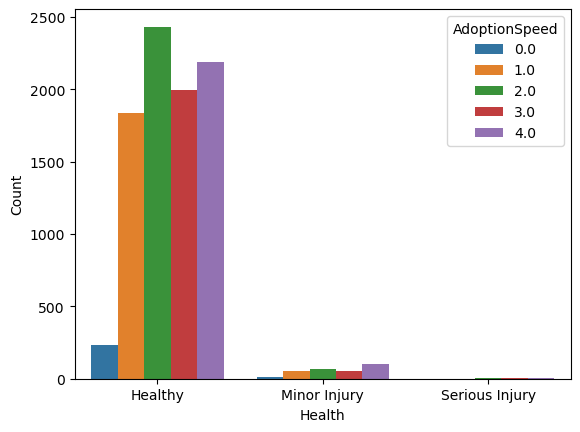

In [31]:
counts = train_set.groupby(['Health', 'AdoptionSpeed']).size().reset_index(name='Count')

sns.barplot(data=counts, x='Health', y='Count', hue='AdoptionSpeed')

plt.xlabel('Health')
plt.ylabel('Count')
plt.legend(title='AdoptionSpeed', loc='upper right')

plt.show()

We can observe from the graph that conditions 2 and 3, which relate to minor and significant injuries respectively, have a very small number of data points. The strongest inference we can make from the visualization is that the majority of the animals at the shelter are in good health. I assumed that a healthy pet would be adopted out soon, but i couldn't come to any relevant conclusions. We also took into account the possibility that a wounded animal would pass away while being cared for at the shelter or be put to death.

### Fee

Adoption fees are one of the interesting aspects. While some animals can be adopted for nothing, some cost money.

In [32]:
train_set.Fee.value_counts().head(10)

0.0      7455
50.0      302
100.0     267
200.0     152
150.0     110
20.0      102
300.0      90
250.0      61
30.0       59
10.0       44
Name: Fee, dtype: int64

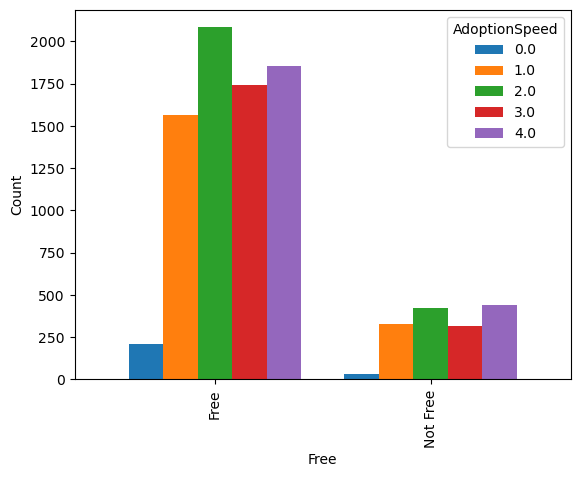

In [33]:
train_set['Free'] = train_set['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')
test_set['Free'] = test_set['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')
all_data['Free'] = all_data['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')

counts = all_data.groupby(['Free', 'AdoptionSpeed']).size().reset_index(name='Count')

matrix = counts.pivot(index='Free', columns='AdoptionSpeed', values='Count')

ax = matrix.plot(kind='bar', stacked=False, width=0.8)

plt.xlabel('Free')
plt.ylabel('Count')
plt.legend(title='AdoptionSpeed', loc='upper right')

plt.show()

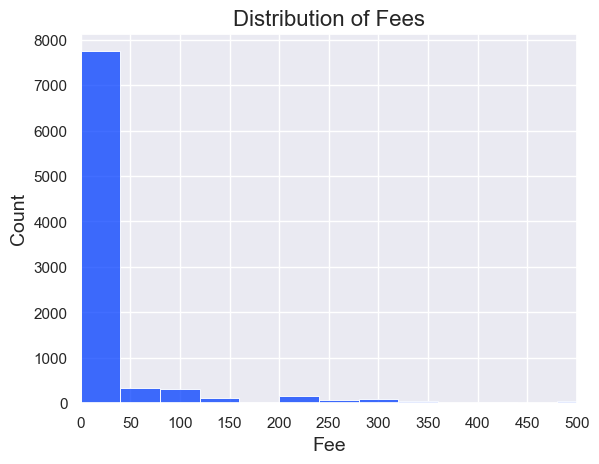

In [34]:
sns.set(palette='bright')

sns.histplot(data=train_set, x='Fee', bins=50)

plt.xlabel('Fee', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Fees', fontsize=16)

plt.xlim(0, 500)
plt.xticks(range(0, 501, 50))
plt.show()

The majority of pets are free, thus it would appear that charging a price slightly decreased the probability of adoption.

### Breed

In [35]:
train_set.Breed.value_counts().head(10)

Mixed_Breed             3776
Domestic_Short_Hair     1866
Domestic_Medium_Hair     657
Tabby                    204
Siamese                  170
Persian                  144
Domestic_Long_Hair       143
Shih_Tzu                 138
Labrador_Retriever       138
Poodle                   130
Name: Breed, dtype: int64

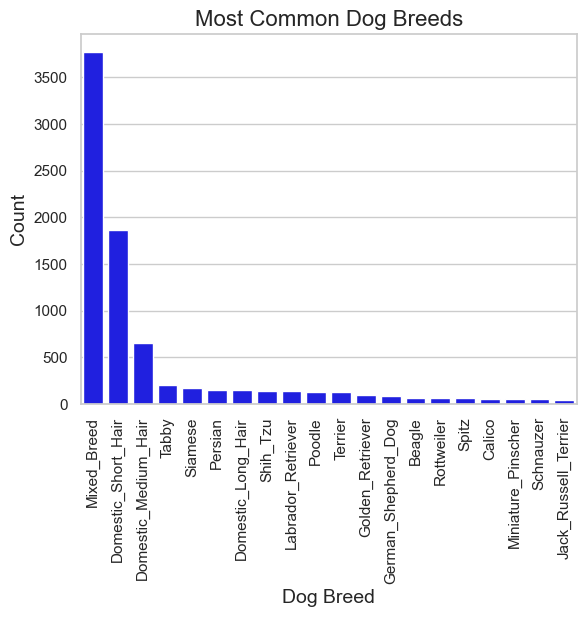

In [36]:
sns.set(style='whitegrid', palette='bright')

breed_counts = train_set['Breed'].value_counts()

top_breeds = breed_counts[:20]
sns.barplot(x=top_breeds.index, y=top_breeds.values, color='blue')

plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Common Dog Breeds', fontsize=16)

plt.xticks(rotation=90)

plt.show()

The most common pet breeds in are Domestic Short Hair, Domestic Medium Hair, and Mixed Breed. This indicates that there may be more abandoned or mixed-breed pets in the dataset than other kinds of pets, as well as a greater number of domestic cats.

Tabby, Siamese, Shih Tzu, Labrador Retriever, Domestic Long Hair, Persian, and Poodle are some of the other common breeds in the dataset. These breeds may be kept as pets by owners more frequently or may be more frequently given up to animal shelters or rescue groups.


In [37]:
train_set = train_set.drop(['dataset_type','Free'], axis=1)
test_set = test_set.drop(['dataset_type','Free'], axis=1)

In [38]:
y_train = train_set['AdoptionSpeed']
X_train = train_set.drop(['AdoptionSpeed'], axis=1)

In [39]:
cat_cols = ['Type', 'Gender', 'Breed', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength','Vaccinated', 'Dewormed','Sterilized','Health']
num_cols = ['Age', 'Fee']
txt_cols = ['Description']
img_cols = ['Images']

In [40]:
# Build the image list of the training set 

# img_dir = 'train_images/'

X_train['Images'] = [path +img for img in train_set['Images']]

### Dataset Balance

When we refer to a "balanced dataset," we refer to how the target variable is distributed throughout the classification problems. Each class in the target variable should have approximately the same number of instances in a balanced dataset, which can help the model perform better by preventing it from being biased towards the dominant class.

In order to ensure that the model learns from a more representative sample of each class, the dataset must be balanced. This does not entail balancing individual features but rather addressing the imbalance in the target variable.

In [41]:
print('Number of observations per class:')
print(y_train.value_counts())

Number of observations per class:
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: AdoptionSpeed, dtype: int64


<AxesSubplot:xlabel='AdoptionSpeed', ylabel='count'>

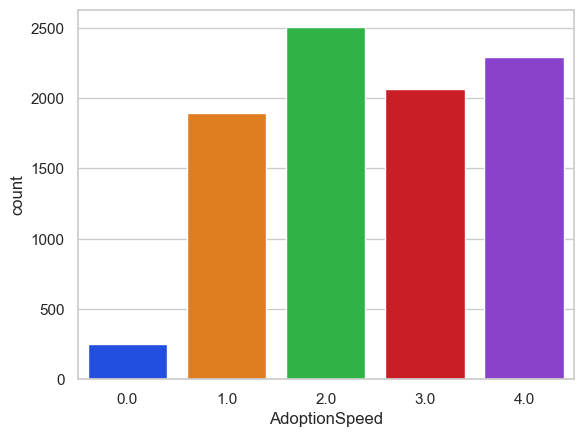

In [42]:
sns.countplot(x=y_train)

It appears that the AdoptionSpeed target variable is moderately imbalanced, with the largest class (class 2.0) having about 30% more samples than the smallest class (class 0.0).

This level of imbalance is not severe, and may not require complex balancing techniques such as oversampling, undersampling, or cost-sensitive learning. However, it may still affect the performance of some machine learning models, especially those that are sensitive to the distribution of the target variable.

To solve the imbalance problem instead of sampling more data to make our dataset even more heavy to make it not efficient to train in this short period and running out of memory I looked at the slides from the last classes to address this problem.

**Algorithm strategies** (copied from the slides)

* Class weights:
    * Instead of repeating samples (or removing samples) \
        Weigth the loss function

    * Works for most models:\
        logistic regression, SVM, Random Forest, Neural Network   
    * Doesn’t work for some models:\
        Knn, NB

* Same effect as over-sampling (add samplers)
    * But not as expensive à dataset remain the same \
    * Generally class_weight parameter of the model\
        'balanced': adjust weights inversely proportional to class frequencies\   
        {class_label: weight}
        
* Main advantage
    * Does not change the data and calculation time

To address this imbalance, we can use techniques such as sample weighting in the newer version of scikit learn (technique from the slides) to adjust the weight of each class. For example, we can use the sample_weight parameter in scikit-learn's classifiers so the weights can be used to give different importance to individual samples while training a model. The balanced option for the sample_weight_weight parameter can be useful for moderate class imbalance, as it automatically adjusts the weights based on the inverse frequency of each class.

The good thing about the sample_weight parameter that it doesn't affect the size of the dataset and the computational time which in our case is crucial as we have 9000 images and overall tabular data.

I will use the compute_sample_weight function as the Gradient Boosting Classifier doesn't initially have the class_weight parameter.

In [43]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

Now, sample_weights is an array containing the weight for each sample in y_train. I passed this array as the sample_weight parameter to the fit method of my classifier. (remembering that some classifiers already have class_weight parameter so no need to use the sample_weights)

### Working with the images 

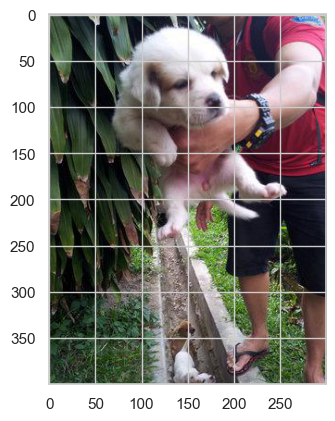

In [44]:
from skimage import io

img = io.imread(X_train['Images'][10])

plt.imshow(img)

In [45]:
# Converting the image to grey levels 
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [46]:
# Computing SIFT detector and descriptors

sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)

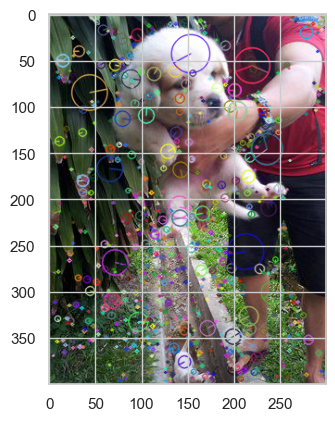

In [47]:
# Plotting the image and keypoints

cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

Using the guidelines provided in moodle for building a sklearn transformer, which can be inserted into a pipeline, accepts images and produces a BOF (Bag of Features) representation.

## Step 1: Extract the SIFTs of each image

In [48]:
def extract_SIFT(img_lst):
    SIFTs = []
    for pathImg in tqdm(img_lst, position=0, leave=True): 
        img = io.imread(pathImg)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) != 2 else img
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(gray, None)
        if not kp and img.shape[2] == 4:
            gray = img[:,:,3]
            kp, des = sift.detectAndCompute(gray, None)
        SIFTs.append(des)
    return SIFTs

In [49]:
# Checking the extraction of SIFTs

SIFTs = extract_SIFT(X_train['Images'])

100%|███████████████████████████████████████| 9000/9000 [04:33<00:00, 32.86it/s]


## Step 2: clusterize the SIFTs

In [50]:
from sklearn.cluster import MiniBatchKMeans

def clusterize(SIFTs, nb_img_features=3): # nb_img_features is a hyperparameter
    clusterizer = MiniBatchKMeans(n_clusters=nb_img_features)
    flat_list = np.concatenate(SIFTs, axis=0)
    clusterizer.fit(flat_list)
    return clusterizer

In [51]:
# Checking if the clusterizer works properly

# clusterizer = clusterize(SIFTs, verbose=True)

## Step 3: building the BOW representation of each image

In [52]:
def build_BOFs(SIFTs, clusterizer):
    nb_img_features = clusterizer.get_params()['n_clusters']
    BOFs = np.zeros((len(SIFTs), nb_img_features), dtype=int)
    flat_list = np.concatenate(SIFTs, axis=0)
    labels = clusterizer.predict(flat_list)
    
    start = 0
    for idx, des in enumerate(SIFTs):
        for label in labels[start:start + len(des)]:
            BOFs[idx, label] += 1
        start += len(des)

    return BOFs

In [53]:
# Checking if the building BOF works properly

# BOFs = build_BOFs(SIFTs, clusterizer, verbose=True)
# BOFs.shape

In [54]:
class BOF_extractor(BaseEstimator, TransformerMixin): 
    def __init__(self, nb_img_features=1, verbose=False): #nb_img_features is hyperparameter
        self.nb_img_features = nb_img_features
        self.verbose = verbose
        
    def fit(self, X, y=None):
        if self.verbose:
            print("BOF.fit()")
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(self.SIFTs, self.nb_img_features)
        return self
        
    def transform(self, X, y=None):
        if self.verbose:
            print("BOF.transform()")
        SIFTs = extract_SIFT(X)
        return build_BOFs(SIFTs, self.clusterizer)
    
    def fit_transform(self, X, y=None):
        if self.verbose:
            print("BOF.fit_transform()")
        self.fit(X, y)
        return self.transform(X, y)

In [55]:
# Testing the BOF_extractor

# test_BOF_extractor = BOF_extractor(nb_img_features=4)
# BOFs = test_BOF_extractor.fit_transform(X_train['Images'])
# BOFs = test_BOF_extractor.transform(X_test['Images'])

Now that we have our own custom Bag of Features extractor we can include it in the pipeline for further use for both finding the best hyperparameters and training our different model.

In [59]:
set_config('display')

# Use GridSearchCV for each Classifier to get best model

In my analysis and model prediction I tried different models like: 
- Random Forest Classifier
- Support Vector Classifier
- KNearestNeighbours Classifier
- Gradient Boosting for classification
- Bagging Decision Trees
- Logistic Regression
- Ridge Classifier

Below I will only keep the Gradient Boosting Classifier as it was performing the best for me.The other models, their grid search and model predictions will be commented.\
Here is the parameter search for my best model.

I tried to tune the models and fit them both with the **sample_weights** parameter to have balanced and tried without the parameter. 

In [60]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
text_preprocessor = CountVectorizer()
image_preprocessor = BOF_extractor(nb_img_features=3) # nb_img_features is hyperparameter 

preprocessor = ColumnTransformer([
    ("categorical encoding", categorical_preprocessor, cat_cols),
    ("numerical encoding", numerical_preprocessor, num_cols),
    ("text encoding", text_preprocessor, 'Description'),
    ("image encoding", image_preprocessor, 'Images'),
])

I used the the **OneHotEncoder** with handle_unknown="ignore" as a categorical feature preprocessor because:

- There are numerous category attributes, including "Type," "Gender," "Color1," "Color2," and "Color3," as well as "MaturitySize," "FurLength," "Vaccinated," "Dewormed," "Sterilized," and "Health." By turning each distinct category's categorical features into a binary column (0 or 1), OneHotEncoder efficiently handles categorical features and makes it simpler for models to record relationships between categories.

- There are no ordinal relationships. Many of the categorical features in the dataset do not have an ordinal relationship. For example, 'Color1', 'Color2', and 'Color3' are nominal features with no inherent order. OneHotEncoder avoids making ordinal assumptions about the categories, which can help prevent the model from learning incorrect relationships between categories.

- Dealing with missing or unidentified categories. The category "Unknown" for some features in the dataset indicates information that was either not observed or was missing. In addition, new groups that were absent from the training set may appear in the test set or in subsequent data. The handle_unknown="ignore" parameter makes sure that when the OneHotEncoder runs into an unknown category during the transformation process, it won't report an error. When working with new or unknown data, this aids in maintaining the pipeline's robustness.

Looking at the age distribution, it is right-skewed, so using the **StandardScaler** for preprocessing the numerical features is good because:

- Centering and scaling: By changing the features to have a zero mean and unit variance, the StandardScaler standardizes the features. This guarantees that all features have the same scale and are centered around zero.

- Handling skewness: The StandardScaler can be more resistant to skewed distributions than the MinMaxScaler, as the MinMaxScaler is more sensitive to outliers, even though it doesn't explicitly address the skewness of the distribution. The StandardScaler could reduce the effect of the skewness on the model's success by scaling the data to have unit variance.

- Robustness to outliers: While the StandardScaler is still sensitive to outliers, it's less sensitive compared to the MinMaxScaler. StandardScaler scales the data based on the mean and standard deviation, which can be more robust to the presence of outliers than MinMaxScaler's approach of scaling based on the minimum and maximum values.

I use the **CountVectorizer** only on the "Description" column because:

- Simplicity: CountVectorizer is a simple and effective method for transforming text data into numerical format. 

- Capturing word frequency information: capturing the order of words

And finally I use the custiom BOF extractor class for the image data. I tried with different hyperparameter values for the nb_img_features.

Let's see how we do in the GridSearch and model training.


### Gradient Boosting Classifier with balanced target weights

In [61]:
# #Gradient Boosting Classifier

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier", GradientBoostingClassifier())
# ])

# parameters = {
#               'classifier__n_estimators': [10, 100, 1000],
#               'classifier__learning_rate': [0.001, 0.01, 0.1],
#               'classifier__subsample': [0.5, 0.7, 1.0],
#               'classifier__max_depth': [3, 7, 9]
# }

# grid_search_stb = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10)
# grid_search_stb.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_stb.best_score_)
# print("Best parameters found:")
# print(grid_search_stb.best_params_)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier   
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 1000, subsample = 0.7)
model_gb = make_pipeline(preprocessor, gb)
model_gb.fit(X_train,y_train, gradientboostingclassifier__sample_weight=sample_weights)

100%|███████████████████████████████████████| 9000/9000 [04:17<00:00, 34.99it/s]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Breed',
                                                   'Color1', 'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description

In [63]:
y_pred_gb = model_gb.predict(test_set)

100%|█████████████████████████████████████████| 500/500 [00:13<00:00, 37.68it/s]


In [64]:
# Saving the results in the results.csv file 

# results = pd.read_csv(path + 'results.csv')
# results['GradientBoostingClassifier'] = y_pred_gb
# results.to_csv('results.csv', index=False)

I tried the models without balancing and it seems to me that the gradient boosting classifier itself performs better so I kept it here commented just for you to see.

### Gradient Boosting Classifier

In [65]:
# Gradient Boosting Classifier

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier", GradientBoostingClassifier())
# ])

# parameters = {
#               'classifier__n_estimators': [10, 100, 1000],
#               'classifier__learning_rate': [0.001, 0.01, 0.1],
#               'classifier__subsample': [0.5, 0.7, 1.0],
#               'classifier__max_depth': [3, 7, 9]
# }

# grid_search_stb = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10)
# grid_search_stb.fit(X_train, y_train)

# print("Best score:")
# print(grid_search_stb.best_score_)
# print("Best parameters found:")
# print(grid_search_stb.best_params_)

In [66]:
# Training the model on the chosen hyperparameters from the grid search

# from sklearn.ensemble import GradientBoostingClassifier 
# gb = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 11, n_estimators = 1000, subsample = 0.5, random_state=42)
# model_gb = make_pipeline(preprocessor, gb)
# model_gb.fit(X_train,y_train)

In [67]:
# Predicting on the test dataset

# y_pred_gb = model_gb.predict(test_set)

#### And here are all the other models that I tried:

### Logistic Regression 

In [68]:
# Logistic Regression 
# from sklearn.linear_model import LogisticRegression
# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier",LogisticRegression())
# ])

# parameters = {
#               'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
#               'classifier__penalty': ['l2'],
#               'classifier__C': [100, 10, 1.0, 0.1, 0.01]
#   }

# grid_search_lr = GridSearchCV(pipe, parameters, cv=2 ,n_iter = 20, verbose=10)
# grid_search_lr.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_lr.best_score_)
# print("Best parameters found:")
# print(grid_search_lr.best_params_)

In [69]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear',  class_weight='balanced')
# model_lr = make_pipeline(preprocessor, lr)
# model_lr.fit(X_train,y_train)

In [70]:
# y_pred_lr = model_lr.predict(test_set)

In [71]:
# Saving the results in the results.csv file 

# results = pd.read_csv(path + 'results.csv')
# results['Logistic Regression'] = y_pred_lr
# results.to_csv('results.csv', index=False)

### Random forest classifier

In [72]:
# Random forest classifier

# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier", RandomForestClassifier())
# ])

# parameters = {
#               'classifier__n_estimators': [10, 100, 1000],
#               'classifier__max_features': ['sqrt', 'log2'],
#               'classifier__max_depth' : [5,10,15,20],
#               'classifier__criterion' :['gini']
# }

# grid_search_rfc = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10, n_jobs=-1)
# grid_search_rfc.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_rfc.best_score_)
# print("Best parameters found:")
# print(grid_search_rfc.best_params_)

In [73]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(criterion='gini',max_depth=10, max_features = 'sqrt', n_estimators = 100, class_weight='balanced')
# model_rf = make_pipeline(preprocessor, rf)
# model_rf.fit(X_train,y_train)

In [74]:
# y_pred_rf = model_rf.predict(test_set)

In [75]:
# results = pd.read_csv(path + 'results.csv')
# results['RFC'] = y_pred_rf
# results.to_csv('results.csv', index=False)

### K Neighbors Classifier

In [76]:
# KNeighborsClassifier

# from sklearn.neighbors import KNeighborsClassifier

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier",KNeighborsClassifier())
# ])

# parameters = {
#               'classifier__n_neighbors': range(1, 21, 2),
#               'classifier__weights': ['uniform', 'distance'],
#               'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
#   }

# grid_search_knn = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10)
# grid_search_knn.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_knn.best_score_)
# print("Best parameters found:")
# print(grid_search_knn.best_params_)

In [77]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(metric='euclidean', n_neighbors = 8, weights = 'distance')
# model_knn = make_pipeline(preprocessor, knn)
# model_knn.fit(X_train,y_train)

In [78]:
# y_pred_knn = model_knn.predict(test_set)

### Support vector machine classifier 

In [79]:
# #Support vector machine classifier                                        
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier",SVC())
# ])

# # make lists of different parameters to check
# parameters = {
#               'classifier__C': [ 1000,0.1, 10, 100, 1],
#               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'classifier__kernel': ['rbf','linear']
#   }
# grid_search_svm = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10, n_jobs=-1)
# grid_search_svm.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_svm.best_score_)
# print("Best parameters found:")
# print(grid_search_svm.best_params_)

In [80]:
# svc = SVC(C=10, gamma=0.01, kernel='rbf')
# model_svc = make_pipeline(preprocessor, svc)
# model_svc.fit(X_train, y_train, class_weight='balanced')

In [81]:
# y_pred_svc = model_svc.predict(test_set)

### Bagging decision trees

In [82]:
# #Bagging decision trees
# from sklearn.ensemble import BaggingClassifier

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier",BaggingClassifier())
# ])

# parameters = {
#               'classifier__n_estimators': [10, 100, 1000]
# }


# grid_search_bdt = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10)
# grid_search_bdt.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_bdt.best_score_)
# print("Best parameters found:")
# print(grid_search_bdt.best_params_)

In [83]:
# from sklearn.ensemble import BaggingClassifier
# bc = BaggingClassifier(n_estimators = 1000)
# model_bc = make_pipeline(preprocessor, bc)
# model_bc.fit(X_train, y_train)

In [84]:
# y_pred_bc = model_bc.predict(test_set)

In [85]:
# results = pd.read_csv(path + 'results.csv')
# results['Bagging Classifier'] = y_pred_bc
# results.to_csv('results.csv', index=False)

### Ridge Classifier

In [86]:
# #Ridge Classifier

# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ("classifier",RidgeClassifier())
# ])

# parameters = {
#               'classifier__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# }

# grid_search_rc = GridSearchCV(pipe, param_grid=parameters, cv=2, verbose=10)
# grid_search_rc.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# print("Best score:")
# print(grid_search_rc.best_score_)
# print("Best parameters found:")
# print(grid_search_rc.best_params_)

In [87]:
# from sklearn.linear_model import RidgeClassifier¶
# rc = RidgeClassifier(alpha = 0.7, class_weight='balanced')
# model_rc = make_pipeline(preprocessor, rc)
# model_rc.fit(X_train, y_train)

In [88]:
# y_pred_rc = model_rc.predict(test_set)

In [89]:
# results = pd.read_csv(path + 'results.csv')
# results['Ridge Classifier'] = y_pred_rc
# results.to_csv('results.csv', index=False)

In [90]:
# Saving the best model

# results = pd.read_csv(path + 'results.csv')
# results['best_model'] = y_pred_gb
# results.to_csv('results.csv', index=False)

### Conclusion

In this notebook, I have analyzed a dataset of animal adoption records containing various features such as Type, Age, Gender, Color, Vaccination, Deworming, Sterilization, Health, Fee, Breed, and Description. I explored the balance of the dataset and worked with the images associated with each record.

I started by outlining the dataset and analyzing each feature in order to acquire understanding of their distributions and relationships. We were able to determine the most crucial features for our machine learning pipeline thanks to this knowledge of the data.

To leverage the image data, developed a Bag of Words (BOW) representation for each image by extracting SIFT features, clustering them, and building the BOW representation for each image. This approach helps to capture visual information that may be important for predicting adoption outcomes.

Then, using GridSearchCV, I was able to identify the optimal models and hyperparameters for a number of classifiers, including the Gradient Boosting Classifier, Logistic Regression, Random Forest Classifier, K Neighbors Classifier, Support Vector Machine Classifier, Bagging Decision Trees, and Ridge Classifier.

In conclusion, this study has demonstrated the importance of understanding the data, preprocessing the features effectively, and evaluating multiple machine learning models to find the best solution for a given problem. The combination of text, numerical, and image data allowed us to build a comprehensive predictive model that can potentially improve the adoption process and help match animals with the best possible homes. Future work could include refining the image feature extraction process, experimenting with more advanced text preprocessing techniques, and exploring other machine learning models to further improve prediction accuracy.